# Comparison of Pycaret and Scikit-Learn in Airplane Price Prediction Using Regression

## Project Summary
This project built and evaluated machine learning models to predict airplane prices using two different approaches:
PyCaret – a low-code, automated machine learning library
Scikit-learn – a more customizable, code-intensive ML framework
The dataset contained various aircraft specifications, including model, engine type, fuel consumption, and sales region. 
Both workflows included preprocessing, model training, evaluation, and performance comparison using key regression metrics like MAE, RMSE, and R².

 ## Introduction
This project leverages supervised machine learning techniques to compare pycaret and scikitlearn to predict the price of airplanes based on various attributes such as model, engine type, capacity, fuel consumption, and more. The goal is to build a regression model that accurately estimates the price using historical aircraft data.

### Importing Required Libraries
We import the necessary libraries for data manipulation, preprocessing, model training, and evaluation.

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Exploratory Data Analysis (EDA)
Loading and Encoding the dataset.
The dataset is loaded, and categorical variables are label-encoded to prepare for modeling.

In [44]:
df = pd.read_csv("C:\\Users\\Bata\\airplane_price_dataset.csv")

In [45]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12377 entries, 0 to 12376
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Model                       12377 non-null  object 
 1   Production Year             12377 non-null  int64  
 2   Number of Engines           12377 non-null  int64  
 3   Engine Type                 12377 non-null  object 
 4   Capacity                    12377 non-null  int64  
 5   Range In KM                 12377 non-null  int64  
 6   Fuel Comsumption in L/hour  12377 non-null  float64
 7   Hourly Maintenance Cost     12377 non-null  float64
 8   Age                         12377 non-null  int64  
 9   Sales Region                12377 non-null  object 
 10  Price in $                  12377 non-null  float64
dtypes: float64(3), int64(5), object(3)
memory usage: 1.0+ MB
None


In [46]:
print(df.describe())

       Production Year  Number of Engines      Capacity   Range In KM  \
count     12377.000000       12377.000000  12377.000000  12377.000000   
mean       2001.477660           1.835259    190.413994   7782.210148   
std          12.766785           0.370962    142.662710   5492.478746   
min        1980.000000           1.000000      4.000000   1285.000000   
25%        1990.000000           2.000000     50.000000   3000.000000   
50%        2001.000000           2.000000    162.000000   5700.000000   
75%        2013.000000           2.000000    350.000000  14800.000000   
max        2023.000000           2.000000    396.000000  15600.000000   

       Fuel Comsumption in L/hour  Hourly Maintenance Cost           Age  \
count                12377.000000             12377.000000  12377.000000   
mean                    12.075615              2744.089599     21.522340   
std                      9.905418              1293.209611     12.766785   
min                      2.000000     

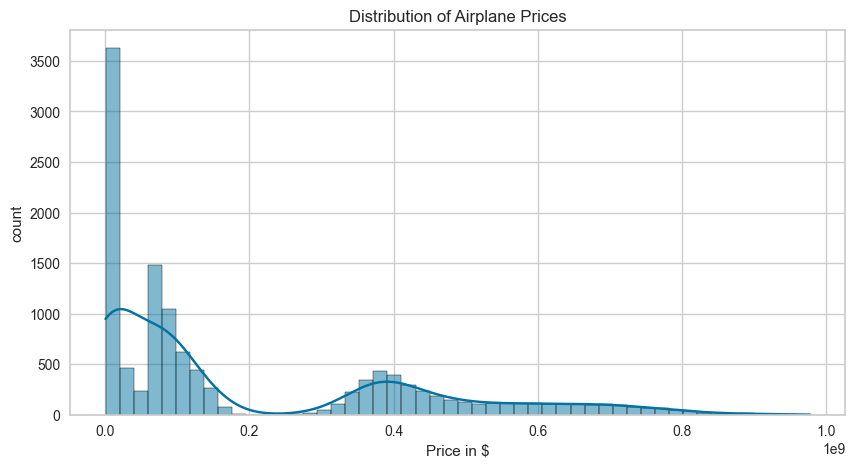

In [47]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Price in $'], kde=True, bins=50)
plt.title('Distribution of Airplane Prices')
plt.xlabel('Price in $')
plt.ylabel('count')
plt.show()

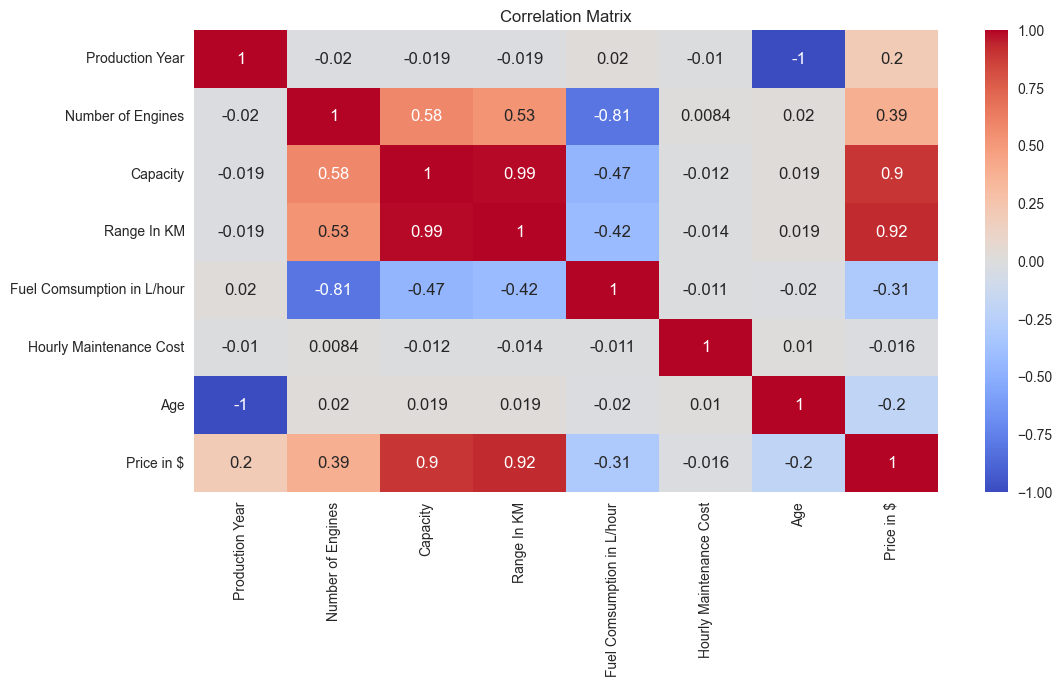

In [48]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

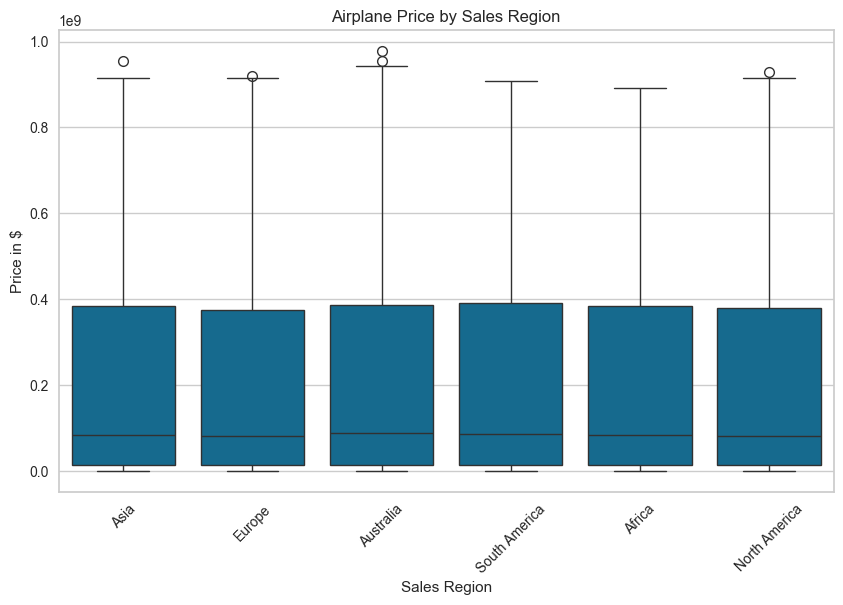

In [49]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Sales Region', y='Price in $')
plt.title('Airplane Price by Sales Region')
plt.xticks(rotation=45)
plt.show()

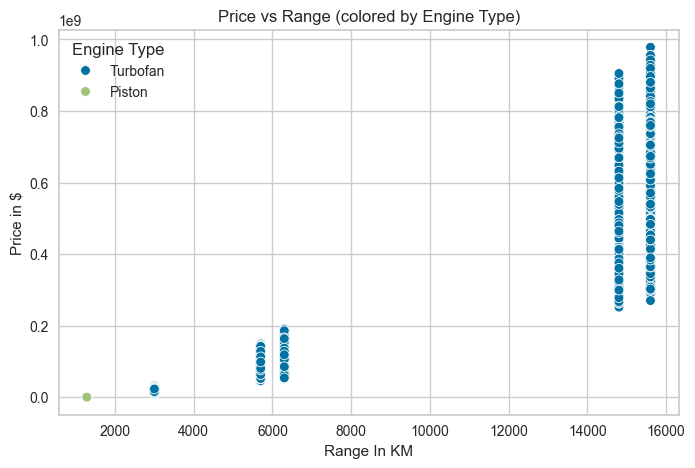

In [50]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Range In KM', y='Price in $', hue='Engine Type')
plt.title('Price vs Range (colored by Engine Type)')
plt.show()

## Splitting Features and Target
The data is split into features (`X`) and the target variable (`y`).

In [31]:
X = df_encoded.drop('Price in $', axis=1)
y = df_encoded['Price in $']

In [32]:
num_features = ['Production Year', 'Number of Engines', 'Capacity', 'Range In KM', 'Fuel Comsumption in L/hour', 'Hourly Maintenance Cost', 'Age']
cat_features = ['Model', 'Engine Type', 'Sales Region']

### Preprocessing Pipeline
A column transformer is used to scale numerical features and encode categorical ones.

In [33]:
preprocessor = ColumnTransformer(transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)])

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [60]:
X_train.shape, len(X_train)

((9901, 10), 9901)

In [62]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9901, 10), (2476, 10), (9901,), (2476,))

In [63]:
y_train.value_counts()

Price in $
2.393286e+05    2
1.338123e+07    1
1.438447e+07    1
1.244043e+07    1
6.127368e+07    1
               ..
8.363345e+07    1
4.032106e+08    1
3.451876e+08    1
4.638420e+08    1
3.642491e+08    1
Name: count, Length: 9900, dtype: int64

### Model Creation and Training with Scikit-learn
A Gradient Boosting Regressor is used for training within a pipeline.

In [64]:
md1_selected= 'GradientBoostingRegressor'

In [65]:
md1 = 'GradientBoostingRegressor'
md1

'GradientBoostingRegressor'

In [66]:
model = GradientBoostingRegressor(random_state=123)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [67]:
model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=123)

### Making Predictions and Evaluating Performance
Predictions are made on the test set and evaluation metrics are calculated.

In [68]:
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

C:\Users\Bata\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [69]:
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")

MAE: 15892579.72
RMSE: 30053592.94
R²: 0.9827


In [71]:
md1 = model

In [72]:
# Assigning y_hat variable
y_hat = md1.predict(X_test)
len(y_hat)

2476

In [73]:
y_pred = md1.predict(X_train)
y_pred

array([1.21516922e+07, 6.33873794e+07, 9.90259613e+07, ...,
       1.51831849e+07, 3.94693494e+08, 3.92944341e+08])

### Error Analysis and Residual Computation
This section computes the absolute differences and residuals to understand prediction errors.

In [77]:
eval_df = pd.DataFrame({'Actuals': y_test, 'Preds': y_hat})
eval_df['abs_diff'] = np.abs(eval_df['Actuals'] - eval_df['Preds'])
eval_df['residuals'] = eval_df['Actuals'] - eval_df['Preds']
eval_df.head()

,Actuals,Preds,abs_diff,residuals
2514,2.114197e+07,2.061829e+07,5.236862e+05,5.236862e+05
7350,4.195648e+08,3.958548e+08,2.370995e+07,2.370995e+07
7805,1.327709e+07,1.242190e+07,8.551892e+05,8.551892e+05
8995,1.271069e+07,1.436361e+07,1.652913e+06,-1.652913e+06
11433,5.579360e+07,6.471574e+07,8.922140e+06,-8.922140e+06


### Final Conclusion: PyCaret vs Scikit-learn (Regression)
After running and evaluating both models:

* PyCaret offered a faster and more automated solution. With just a few lines of code, it handled data prep, model comparison, hyperparameter tuning, and evaluation. Ideal for rapid prototyping.

* Scikit-learn required manual configuration (encoding, scaling, model setup), but offered full control over each step. It's better suited for fine-tuned customization and production-level deployments.

* Predictive performance was very similar in both approaches, especially since the same model (e.g., Gradient Boosting Regressor) was used with similar configurations.